En este notebook se pretende ilustrar con algunas aplicaciones sencillas la utilidad de un modelo de regresión lineal. Concretamente, replicar un índice y calcular el Modelo CAPM de la cartera con el índice.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Descarga de datos

Vamos a utilizar los activos del SP500 y el propio valor del índice. Los descargamos de github.

In [4]:
precios_sp500 = pd.read_csv("https://raw.githubusercontent.com/christianolivamoya/MIAX13-ML/refs/heads/main/dataset/data_idx_SP500.csv")
precios_sp500.index = pd.to_datetime(precios_sp500["Date"])
precios_sp500 = precios_sp500.drop(columns=["Date"])
precios_sp500.sample(5)

,IDX
Date,
2017-07-20,219.172958
2016-01-04,172.953018
2022-02-02,439.169678
2012-04-12,110.525757
2013-07-15,137.609238


In [5]:
precios_comp = pd.read_csv("https://raw.githubusercontent.com/christianolivamoya/MIAX13-ML/refs/heads/main/dataset/data_comp_SP500.csv")
precios_comp.index = pd.to_datetime(precios_comp["Date"])
precios_comp = precios_comp.drop(columns=["Date"])
precios_comp.sample(5)

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-25,39.372028,26.217669,44.997879,NaN,36.497154,19.056667,72.328728,72.000000,41.872093,40.193104,...,96.879692,23.840218,154.600861,24.330683,61.807545,33.913300,45.599216,99.828926,73.019997,40.836929
2012-05-22,26.040672,16.798122,NaN,NaN,23.303278,12.860000,47.007397,32.009998,26.915890,23.091496,...,72.948196,12.266670,76.877579,18.409517,49.947159,21.743340,40.068810,52.723045,34.650002,NaN
2023-01-25,154.099625,140.538193,138.344574,104.440002,107.176880,64.800003,265.716309,358.170013,163.232971,81.482422,...,248.222031,30.399143,97.020561,64.368286,106.731186,100.398926,124.941971,123.431297,310.570007,162.787003
2007-06-12,24.044188,3.630639,NaN,NaN,17.118208,7.942222,28.657129,42.730000,23.430227,22.375851,...,80.062225,16.331701,54.551048,11.126989,44.647907,NaN,17.143997,73.757591,39.450001,NaN
2009-04-08,10.395405,3.508191,NaN,NaN,14.659867,6.391111,20.437536,23.920000,13.896084,17.298435,...,42.637901,6.204052,16.828127,10.663252,38.787724,NaN,15.784780,32.992905,18.889999,NaN


In [6]:
precios = pd.concat((precios_comp, precios_sp500), axis=1)
precios = precios.dropna(axis=1)
precios.sample(5)

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WST,WTW,WY,WYNN,XEL,XOM,YUM,ZBH,ZBRA,IDX
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-14,19.231499,5.940883,18.529428,7.905556,31.858280,35.779999,21.597975,20.595381,26.605768,24.559999,...,17.807707,51.256660,9.383564,41.192413,12.797815,39.904030,18.829199,52.348045,27.250000,84.747742
2019-02-14,74.055603,41.004097,66.996956,31.120001,144.841217,260.140015,93.836914,36.014286,131.254822,159.940002,...,99.371117,156.042923,20.137508,117.327286,44.891327,58.217972,84.891800,114.045029,196.470001,250.497192
2009-10-12,17.620857,5.754799,17.089233,7.743333,29.427362,34.360001,19.702818,20.247324,24.521479,25.020000,...,18.008793,54.415138,8.118712,40.051891,11.471650,39.923576,18.990025,45.887589,25.990000,81.573570
2012-09-19,25.716536,21.266127,26.274090,13.743333,52.200310,33.119999,31.254562,19.641134,39.215626,33.560001,...,23.518810,77.395233,16.639729,86.689194,18.507828,55.559650,38.737347,59.031483,38.400002,117.430283
2008-05-14,20.874228,5.617569,18.029072,7.820000,27.903353,40.939999,23.067574,28.466488,25.741247,40.189999,...,20.354753,68.025719,13.662665,64.017387,11.816938,49.775951,21.324972,59.883793,37.570000,102.833008


Como ya sabemos, calculamos los retornos logarítmicos a partir de los precios para trabajar con ellos.

In [7]:
retornos = np.log(precios).diff().dropna()
retornos.sample(5)

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WST,WTW,WY,WYNN,XEL,XOM,YUM,ZBH,ZBRA,IDX
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-01,-0.032481,-0.016230,-0.024625,-0.039038,-0.027926,-0.028103,-0.055914,-0.055924,-0.043683,-0.067589,...,0.012497,0.027931,-0.196412,-0.056519,-0.021951,-0.074356,-0.030783,-0.029246,-0.018058,-0.026830
2022-02-02,0.022506,0.007019,0.022081,0.013017,0.016973,-0.005406,0.021181,0.015241,0.011319,-0.007112,...,0.028514,0.007384,0.020463,-0.023752,0.015933,-0.002602,0.012944,-0.018560,0.014672,0.009667
2009-03-25,0.010709,-0.000094,-0.009299,0.024173,0.012415,0.010919,-0.010534,-0.007615,-0.022485,0.029853,...,0.021959,0.012280,0.023318,-0.010677,0.000000,0.011180,0.007060,0.004951,-0.020363,0.010491
2016-08-16,-0.003309,-0.000914,-0.005107,0.040547,-0.005473,-0.003275,-0.005993,-0.006878,-0.008782,-0.005254,...,-0.012021,-0.000411,-0.012619,-0.022617,-0.011461,0.001252,-0.001558,-0.012471,0.021311,-0.005171
2007-05-01,0.046057,-0.003312,0.006864,-0.023481,-0.001792,0.004082,0.007224,-0.055792,0.040500,0.003145,...,0.004611,0.004379,-0.003921,-0.000392,0.007856,0.003522,0.020164,-0.020320,-0.022621,0.002559


# Replicar un índice

La primera tarea consiste en replicar un índice a partir de un conjunto de activos. Vamos a replicar un índice con todos los activos que tenemos disponibles después del preprocesamiento de arriba.

In [8]:
fecha_ini = "2020-01-01"
fecha_fin = "2020-04-01"

X = retornos.drop(columns=["IDX"])[fecha_ini:fecha_fin]
Y = retornos["IDX"][fecha_ini:fecha_fin]

Sabemos que una cartera se compone de activos. También sabemos que los retornos de la cartera se pueden calcular facilmente como una transformación lineal de los retornos de cada activo según la ecuación:

$$R_t = \sum_{i=1}^N r_{it} w_i$$

donde $r_{it}$ es el retorno del activo $i$ en el tiempo $t$, y $w_i$ es la ponderación de la cartera para el activo $i$.

Esta es exactamente la ecuación de la regresión lineal, asumiendo que el bias $b=0$. Por tanto, si tenemos los retornos de los activos, podemos intentar estimar la cartera $\mathbf{w}$ mediante la regresión lineal:

$$R_{index} = \sum_{i=1}^N r_{it} w_i$$

## Caso 1 (ERROR): Con bias

In [9]:
lr = LinearRegression()
lr.fit(X, Y)
ypred = lr.predict(X)

In [10]:
w = lr.coef_
b = lr.intercept_

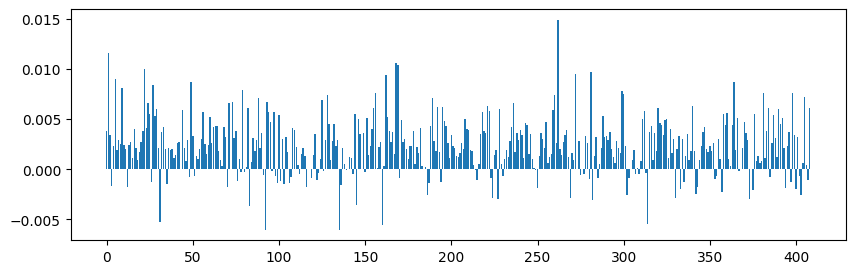

In [11]:
# Visualizamos los pesos
plt.figure(figsize=(10, 3))
plt.bar(range(len(w)), w)
plt.xlabel("")
plt.show()

In [13]:
# ¿Qué sucede con los pesos?
w.sum()

np.float64(0.9565186970883305)

In [14]:
# ¿Qué sucede con el bias?
b

np.float64(-0.00020050096120841424)

**Observaciones**:

- Tenemos un bias $b \neq 0$. Esto es un **error**.

- Tenemos unos pesos $\mathbf{w}$ que no suman 1.

- Tenemos pesos negativos: estamos permitiendo posiciones cortas.

## Caso 2 (OK con posiciones cortas)

In [15]:
# Sin bias <=> fit_intercept=False
lr = LinearRegression(fit_intercept=False)
lr.fit(X, Y)
ypred = lr.predict(X)

In [16]:
w = lr.coef_
b = lr.intercept_

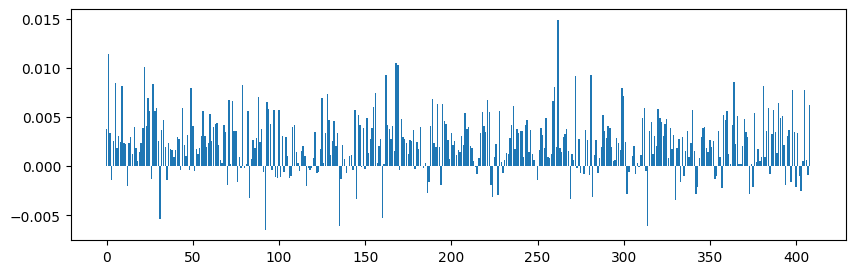

In [17]:
# Visualizamos los pesos
plt.figure(figsize=(10, 3))
plt.bar(range(len(w)), w)
plt.xlabel("")
plt.show()

In [18]:
# ¿Qué sucede con los pesos?
w.sum()

np.float64(0.9580324838490265)

In [19]:
# ¿Qué sucede con el bias?
b

0.0

**Observaciones**:

- Ahora sí, tenemos un bias $b = 0$.

- Seguimos teniendo unos pesos $\mathbf{w}$ que no suman 1. Vamos a solucionarlo normalizando.

In [20]:
w = w / w.sum()
w.sum()

np.float64(0.9999999999999998)

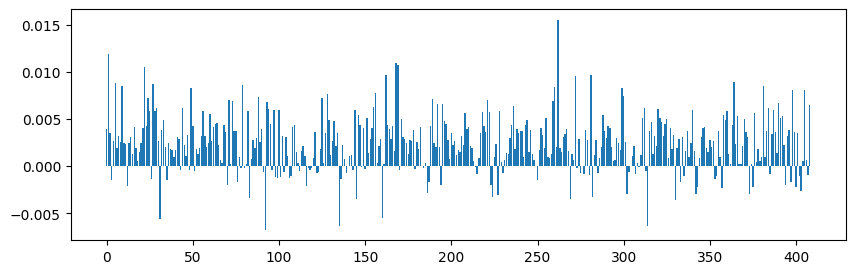

In [21]:
# Visualizamos los pesos
plt.figure(figsize=(10, 3))
plt.bar(range(len(w)), w)
plt.xlabel("")
plt.show()

**Observaciones**:

- Tenemos $b = 0$.

- Los pesos suman 1.

- Tenemos pesos negativos: estamos permitiendo posiciones cortas.

¡Vamos a ver si realmente estamos replicando el índice!

In [22]:
portfolio = X @ w

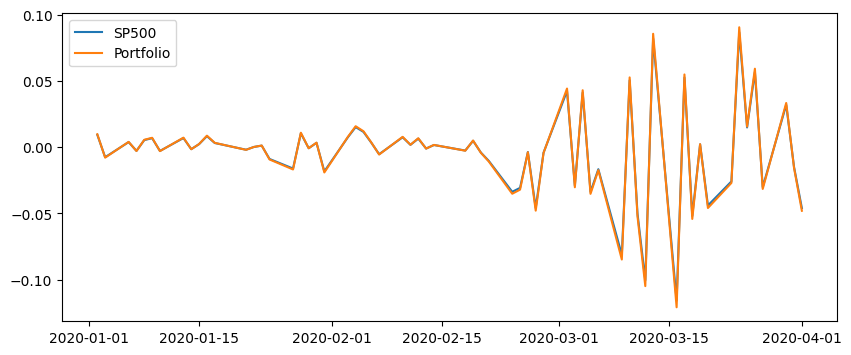

In [23]:
# Representación de los retornos diarios
plt.figure(figsize=(10, 4))
plt.plot(Y, label="SP500")
plt.plot(Y.index, portfolio, label="Portfolio")
plt.legend()
plt.show()

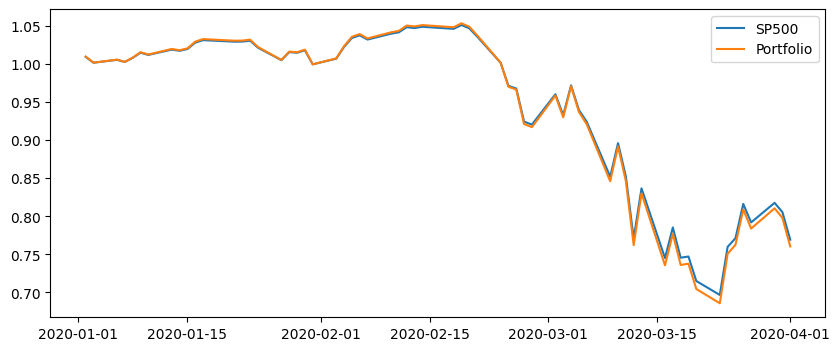

In [24]:
# Representación de los precios
plt.figure(figsize=(10, 4))
plt.plot(np.exp(np.cumsum(Y)), label="SP500")
plt.plot(Y.index, np.exp(np.cumsum(portfolio)), label="Portfolio")
plt.legend()
plt.show()

Quitando pequeñas variaciones, prácticamente estamos replicando completamente el índice en esta ventana de tiempo. ¿Cómo podemos evaluar cómo lo estamos haciendo?

In [25]:
print("R2:", r2_score(Y, portfolio)) # Porcentaje de varianza explicada
print("MSE:", mean_squared_error(Y, portfolio)) # Error cuadrático medio de los retornos

R2: 0.9980534770492174
MSE: 2.349452783354462e-06


Sin embargo, estamos permitiendo posiciones cortas. ¿Podemos intentar replicar el índice sin permitirlo?

## Caso 3 (OK sin posiciones cortas)

In [26]:
# Sin bias <=> fit_intercept=False
lr = LinearRegression(fit_intercept=False, positive=True)
lr.fit(X, Y)
ypred = lr.predict(X)

In [27]:
w = lr.coef_
b = lr.intercept_

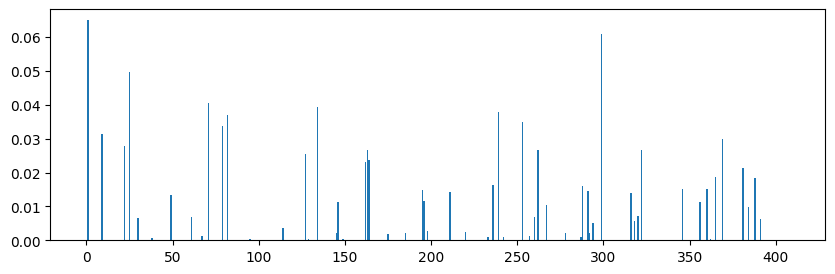

In [28]:
# Visualizamos los pesos
plt.figure(figsize=(10, 3))
plt.bar(range(len(w)), w)
plt.xlabel("")
plt.show()

In [29]:
# ¿Qué sucede con los pesos?
w.sum()

np.float64(0.958576312552785)

In [30]:
# ¿Qué sucede con el bias?
b

0.0

**Observaciones**:

- Tenemos $b = 0$.

- Los pesos no suman 1.

- Todos los pesos son positivos.

In [31]:
w = w / w.sum()
w.sum()

np.float64(1.0000000000000002)

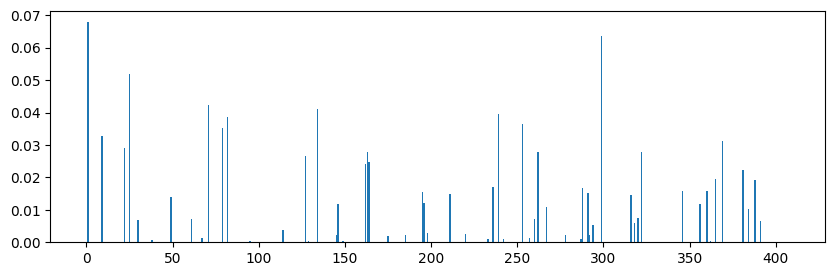

In [32]:
# Visualizamos los pesos
plt.figure(figsize=(10, 3))
plt.bar(range(len(w)), w)
plt.xlabel("")
plt.show()

Intentemos evaluar si se está replicando el índice o no una vez más.

In [33]:
portfolio = X @ w

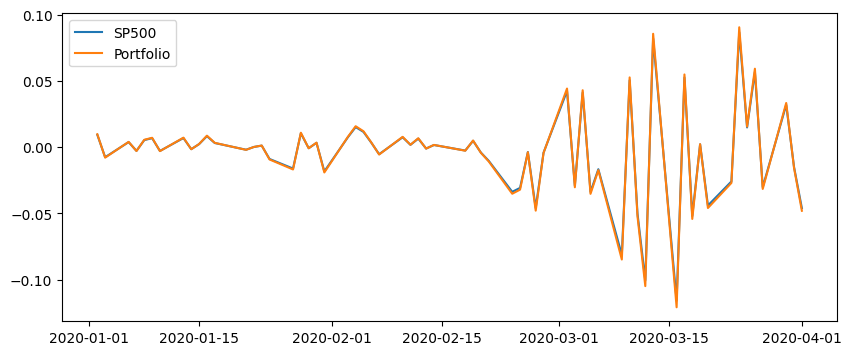

In [34]:
# Representación de los retornos diarios
plt.figure(figsize=(10, 4))
plt.plot(Y, label="SP500")
plt.plot(Y.index, portfolio, label="Portfolio")
plt.legend()
plt.show()

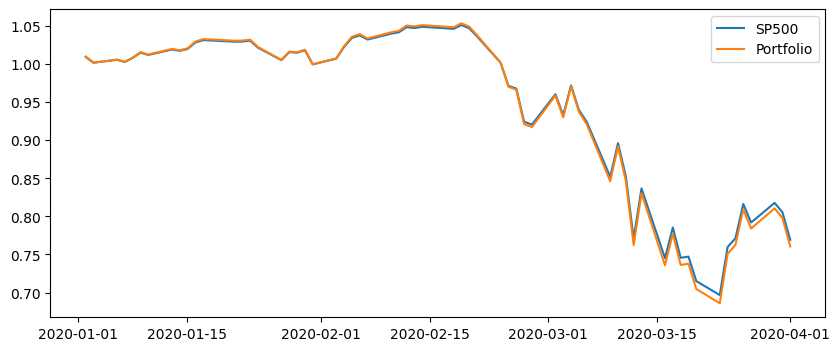

In [35]:
# Representación de los precios
plt.figure(figsize=(10, 4))
plt.plot(np.exp(np.cumsum(Y)), label="SP500")
plt.plot(Y.index, np.exp(np.cumsum(portfolio)), label="Portfolio")
plt.legend()
plt.show()

In [36]:
print("R2:", r2_score(Y, portfolio)) # Porcentaje de varianza explicada
print("MSE:", mean_squared_error(Y, portfolio)) # Error cuadrático medio de los retornos

R2: 0.9981057487057947
MSE: 2.2863609050971587e-06


Ahora sí, tenemos una cartera que no permite posiciones cortas y está replicando al índice con un coeficiente de determinación R2 del 99.81\% (en este ejemplo) y un MSE de $10^{-6}$.

# Modelo CAPM

El modelo CAPM es una herramienta muy conocida en finanzas que relaciona el riesgo de un activo con su rentabilidad esperada respecto al mercado. El modelo CAPM tradicionalmente se define como:

$$\mathbb{E}[R_i] = \alpha + \beta\, \mathbb{E}[R_m]$$

donde $\mathbb{E}[R_i]$ es el valor esperado de la rentabilidad del activo $i$, $\mathbb{E}[R_m]$ es el valor esperado de la rentabilidad del mercado, $\alpha$ reprsenta el rendimiento adicional que el activo ofrece respecto al mercado, y $\beta$ es el riesgo sistemático del activo frente al mercado. El valor $\beta$ se interpreta como:

- $\beta = 1$: el activo se comporta igual que el mercado.
- $\beta > 1$: el activo es más volátil que el mercado.
- $\beta < 1$: el activo es menos volátil que el mercado.
- $\beta < 0$: el activo se mueve en dirección opuesta al mercado.

Si asumimos que el mercado está definido por el índice (en nuestro ejemplo, el SP500) y queremos usar el modelo CAPM, es tan sencillo como calcular la regresión lineal entre los dos retornos.

In [41]:
X = pd.DataFrame(portfolio[fecha_ini:fecha_fin])
Y = Y

lr = LinearRegression()
lr.fit(X, Y)
ypred = lr.predict(X)
print("R2:", r2_score(Y, ypred))
print("MSE:", mean_squared_error(Y, ypred))

R2: 1.0
MSE: 3.886541461859097e-35


In [42]:
betas = lr.coef_
alpha = lr.intercept_

In [43]:
betas

array([0.95857631])

In [44]:
alpha

np.float64(1.734723475976807e-18)

Hemos calculado el modelo CAPM comparando nuestra cartera que replica el índice con el índice. ¿Qué tenemos?

- $\alpha = 0$: Tiene sentido, porque si nuestra cartera replica el índice, no puede tener mayor rendimiento respecto al índice.

- $\beta \approx 0.96$: Tiene sentido, porque frente a pequeñas variaciones, la cartera se comporta como el índice.

**Observación curiosa**:

¿Te has dado cuenta que el valor de la $\beta$ es prácticamente igual a la suma de los pesos de la cartera $\mathbf{w}$ antes de normalizar para que sumasen 1?